# CSMODEL Project 2
## S12 - Group 7
### Members
* BASCO, AVIAN LANCE MEDINA
* NARVAEZ, JOSE WILFREDO SALAPANTAN
* WONG, MICHAEL EDMUND VIRAY

# Dataset Representation

In [2]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [192]:
df = pd.read_csv('Dataset7.csv', sep='\n', header=None)
series = []

for i in range(len(df)):
    series.append(np.array([int(v) for v in df.iloc[i][0].split(',')]))

series = pd.Series(series)
series_min = np.array(list(map(min, series))).min()
series_max = np.array(list(map(max, series))).max()
print('Min Value', series_min)
print('Max Value', series_max)
print('Min Value Count', np.array(list(map(len, series))).min())
print('Max Value Count', np.array(list(map(len, series))).max())
series

Min Value 0
Max Value 19
Min Value Count 1
Max Value Count 8


0              [7, 9, 10, 11]
1       [5, 8, 9, 13, 15, 16]
2                        [13]
3                  [5, 8, 15]
4       [1, 5, 8, 14, 16, 17]
                ...          
1195           [1, 2, 12, 15]
1196              [4, 12, 15]
1197       [0, 1, 10, 18, 19]
1198               [5, 9, 14]
1199              [0, 12, 15]
Length: 1200, dtype: object

In [191]:
columns = [i for i in range(series_min, series_max + 1)]
values = []

for item in series:
    row = [0 for i in range(series_min, series_max + 1)]
    values.append(row)
    
    for num in item:
        row[num] += 1
        
df_processed = pd.DataFrame(data=values, columns=columns)
df_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1196,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1197,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1198,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


The dataset `Dataset7.csv` is a series of comma-separated numbers of varying quantity. The format is newline-separated, where each line represents a single array of comma-separated numbers. There is a total of 1200 observations available in the dataset, and only 1 variable that holds comma-separated numbers of varying quantity. The dataset can be presumed as a association rule mining dataset.

The numbers contained are whole numbers, where some can be found in multiple observations. The lowest value that can be observed is 0, and the highest value is 19. The highest quantity of numbers in a single observation is 8, whereas the lowest quantity is 1.

# Exploratory Data Analysis

## Number Frequency
How often does a number appear on each observation?

The most frequently observed number is 12, appearing 488 times out of 1200 observations, while the least number is 7, appearing 146 times out of 1200 observations. The difference from the most frequent (column 12) and the least frequent (column 7) is 342 out of 1200 observations.

Most Frequent 12 488
Least Frequent 7 146
Most-to-Least Difference 342


<AxesSubplot:>

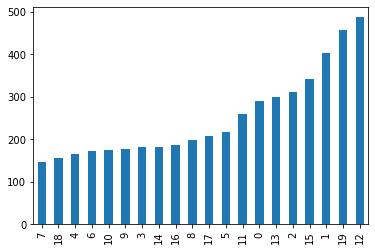

In [190]:
df_processed_sum = df_processed.sum()
print('Most Frequent', df_processed_sum.idxmax(), df_processed_sum.max())
print('Least Frequent', df_processed_sum.idxmin(), df_processed_sum.min())
print('Most-to-Least Difference', df_processed_sum.max() - df_processed_sum.min())
df_processed_sum.sort_values().plot(kind='bar')

## Number Pairing Frequency

What numbers are oftenly seen with another number?

The amount of times a pair of 2 different numbers are found in the same observation.
The intersection point on the table corresponds to the `Number Frequency` value of that number (example; row 7, column 7 is an intersection point containing the value of 146.)

The table below shows the frequency of each number when paired with another number.

In [108]:
result=[]

for column in df_processed.columns:
    result.append(df_processed[df_processed[column] > 0].sum())

df_association = pd.DataFrame(
    data=result,
    columns=df_processed.columns
)
df_association

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,290,58,36,49,34,47,39,37,43,34,54,52,45,58,49,42,48,45,36,179
1,58,404,170,57,43,38,43,42,59,39,60,137,190,139,47,59,46,69,46,175
2,36,170,312,62,49,56,47,41,48,49,52,47,188,53,45,69,51,57,43,180
3,49,57,62,181,32,52,33,28,43,31,38,38,65,47,21,40,41,36,40,80
4,34,43,49,32,165,38,28,27,42,26,30,24,68,25,40,62,27,47,33,55
5,47,38,56,52,38,216,41,40,40,48,37,41,77,52,43,70,53,65,24,76
6,39,43,47,33,28,41,171,37,45,32,40,29,56,39,42,47,28,56,32,44
7,37,42,41,28,27,40,37,146,35,29,26,26,50,30,19,39,19,31,29,51
8,43,59,48,43,42,40,45,35,199,37,35,43,74,50,46,57,33,56,36,81
9,34,39,49,31,26,48,32,29,37,177,35,43,70,47,44,66,19,35,38,49


The graph below is a area-plot version of the table above.

The diagonal line that stretches across the entire plot is the intersection point. The mounds are the frequent pair to the current row. For example, in the first row (which is column 0's row, the blue graph at the top,) is found to be frequently paired with column 19, shown as a mound at the far right.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

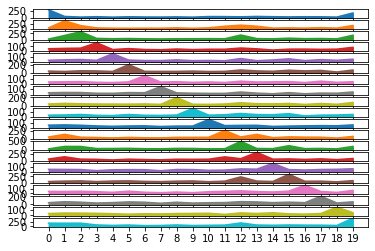

In [173]:
df_association.plot(
    kind='area',
    subplots=True,
    legend=False,
    xticks=df_association.columns
)